## 데이터 전처리
우선 base code말고, 내 식대로 코드를 짜보고 이후 비교해보겠음.

In [4]:
# 메서드 정의
def load_dataset(): 

    # 본 메서드의 동작 순서
    # 1)파일 열기  2)파일 읽기  3-1)파일 전처리 및 변수화  3-2)실험용 Data 생성
    
    # 1)파일 열기
    # open() 메서드를 통해 csv 파일을 열고 해당 변수를 csvfile 이라 지정
    with open('./Data/Regression_data.csv') as csvfile: 
        # 2)파일 읽기
        # csvfile 변수를 csv.reader() 메서드를 통해 읽고 변수화
        csvreader = csv.reader(csvfile) 
       
        # 3-1)파일 전처리 및 변수화
        # 본 파일의 경우 첫 번째 행은 변수 이름 이므로 이를 건너뛰어 줍니다. 
        next(csvreader) 
       
        # append() 메서드를 통해 값을 저장하기 위한 변수
        rows = [] 
        # 반복문 및 append() 을 통해 값을 하나씩 저장
        for row in csvreader:
            rows.append(row) 
    
    # 3-2) 실험용 Data 생성 
    # 추후 다른 메서드에서 편하게 사용하기 위한 전역 변수 선언
    # 데이터, 입력 및 출력 계층의 크기
    global data, input_cnt, output_cnt 

    # 입력 및 출력 계층의 크기 지정
    input_cnt, output_cnt = 10, 1
    
    # 임시로 데이터를 저장하기 위한 버퍼를 생성 합니다.
    # 버퍼의 행은 데이터의 개수, 열은 입출력 계층의 수(10+1)
    data = np.zeros([len(rows), input_cnt + output_cnt])

    # 반복문 및 enumerate() 메서드를 통해 버퍼에 본 데이터를 채워넣습니다. 
    # 문자열 정보('M', 'F', 'I')를 숫자정보(100, 010, 001)로 치환합니다.
    for n, row in enumerate(rows):
        
        # 만약 n 번째 행의 첫 번째 열이 문자 'M' 이라면 버퍼의 [0,0] 위치에 1의 숫자정보를 할당. [1,0,0,...]
        # 만약 n 번째 행의 첫 번째 열이 문자 'F' 이라면 버퍼의 [0,1] 위치에 1의 숫자정보를 할당. [0,1,0,...]
        # 만약 n 번째 행의 첫 번째 열이 문자 'I' 이라면 버퍼의 [0,2] 위치에 1의 숫자정보를 할당. [0,0,1,...]
        if row[0] == 'M': 
            data[n, 0] = 1

        if row[0] == 'F':
            data[n, 1] = 1

        if row[0] == 'I': 
            data[n, 2] = 1

        # 이후 나머지 열의 숫자정보(row[1:]) 는 [n, 3:] 위치로 버퍼를 채워줍니다.
        data[n, 3:] = row[1:]

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_19720\129502094.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


> **Data**
> 
> 
> **조개류**의 물리적 특성과 연령에 대한 정보 포함하고있다. **조개류는 성장에 따라 ring 수가 증가한다.** 
> 
> - Sex : M/F/I(Instant: 성체 미성숙)
> - Length : 길이
> - Diameter : 지름
> - Height : 높이
> - Whole weight : 전체 무게
> - Shucked wieght : 껍질 제거 후 무게
> - Viscera weight : 내장 무게
> - Shell weight : 껍질 무게
> - **Rings (Target Feature)** : 조개류의 나이를 나타낸다.  

    * 조개 껍데기에 새겨진 성장 줄무늬로 조개 나이 추정함.(나무의 나이테와 비슷한 역할)

In [4]:
df = pd.read_csv('./Data/Regression_data.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# profiling 결과 
pr = df.profile_report()
pr.to_file('./regression_data_report.html')

In [5]:
# 결측치 없음
# 중복치 없음

# categorical data : Sex -> Numerical Data
# M:0 / F:1 / I:2 (성체 미성숙)
sex_mapping = {'M':0, 'F':1, 'I':2}
df['Sex'] = df['Sex'].map(sex_mapping)


In [5]:
df.groupby('Sex').count().iloc[:,0]
# Sex 열은 고루고루 있구나.

Sex
0    1528
1    1307
2    1342
Name: Length, dtype: int64

In [6]:
x = df.iloc[:, :-1] 
y = df.iloc[:, -1] # Target Feature

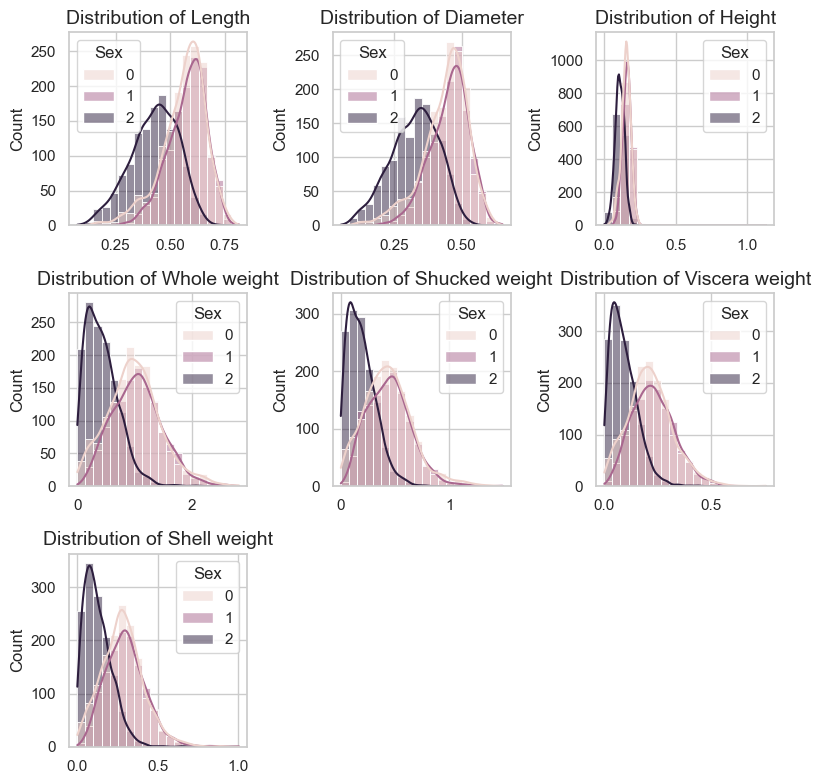

In [119]:
# 성별에 따른 각 분포

# Select only numerical columns for plotting
numerical_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# Create a 3x3 grid for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots

# Plot the numerical distributions for each feature in the grid
for i, column in enumerate(numerical_columns):
    row, col = i // 3, i % 3  # Calculate the row and column for each subplot
    sns.histplot(data=df, x=column, hue='Sex', kde=True, ax=axes[row, col], bins=20, hue_order=['M', 'F', 'I'])
    axes[row, col].set_title(f'Distribution of {column}', fontsize=14)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count', fontsize=12)

# Remove empty subplots
for i in range(len(numerical_columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Show the plots
plt.tight_layout()
plt.show()

모든 독립변수 열에서,  
2:instant(성체 미성숙)이 가장 작은 수치를 보였으며, 0:m(남자)일수록 가장 높은 수치를 보였다.  
* 수치상, 미성숙 < 여자 < 남자  
> **성별이 중요한 feature**로 작용할 것으로 보임.  
> And, 치우쳐져 있는 분포도 보임 -> scaling 해주자

### Scaling

In [116]:
# 성별 빼고 min, max 값 봐보자.  -> 스케일 변환할 지 말지 생각하기
df.describe().loc[['min', 'max']].transpose()[1:-1]

,min,max
Length,0.0750,0.8150
Diameter,0.0550,0.6500
Height,0.0000,1.1300
Whole weight,0.0020,2.8255
Shucked weight,0.0010,1.4880
Viscera weight,0.0005,0.7600
Shell weight,0.0015,1.0050


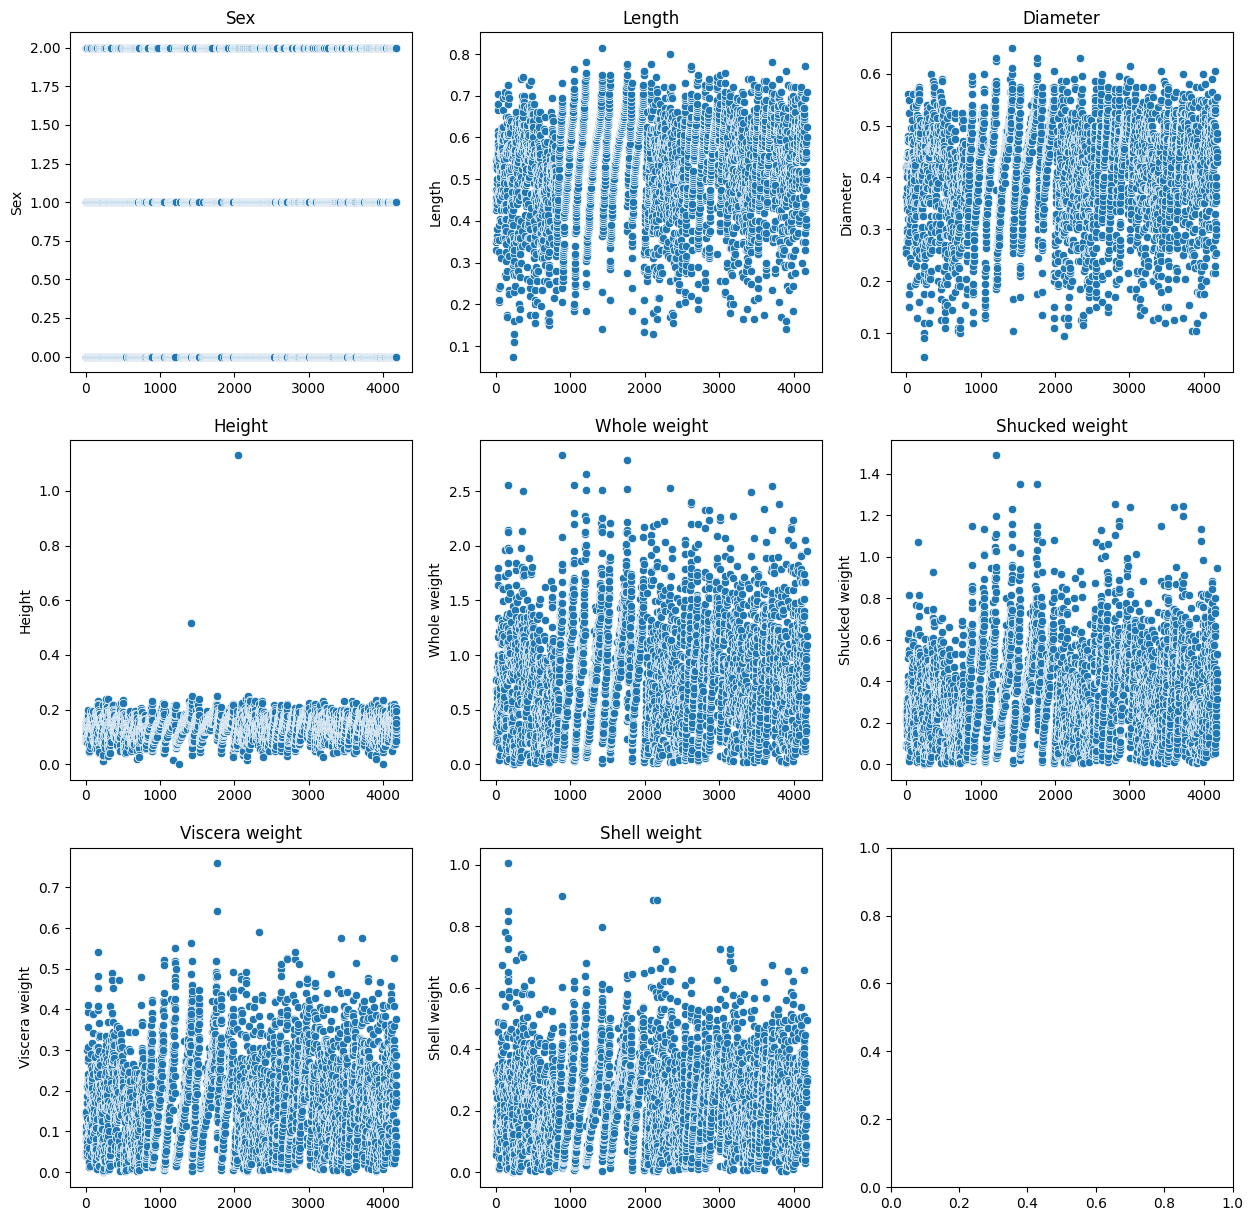

In [28]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15,15))

for i, column in enumerate(x.columns):
    row, col = i//3, i%3
    sns.scatterplot(x[column], ax=axes[row,col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_label(df.Rings)

* height 열 : 이상치 확연히 보임. -> 2개 우선 제거 -> 4155개 데이터 남음
* 다른 feature들은 이상치로 보긴 어려울듯. 

In [6]:
df.drop(df.Height[df.Height >0.3].index, inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

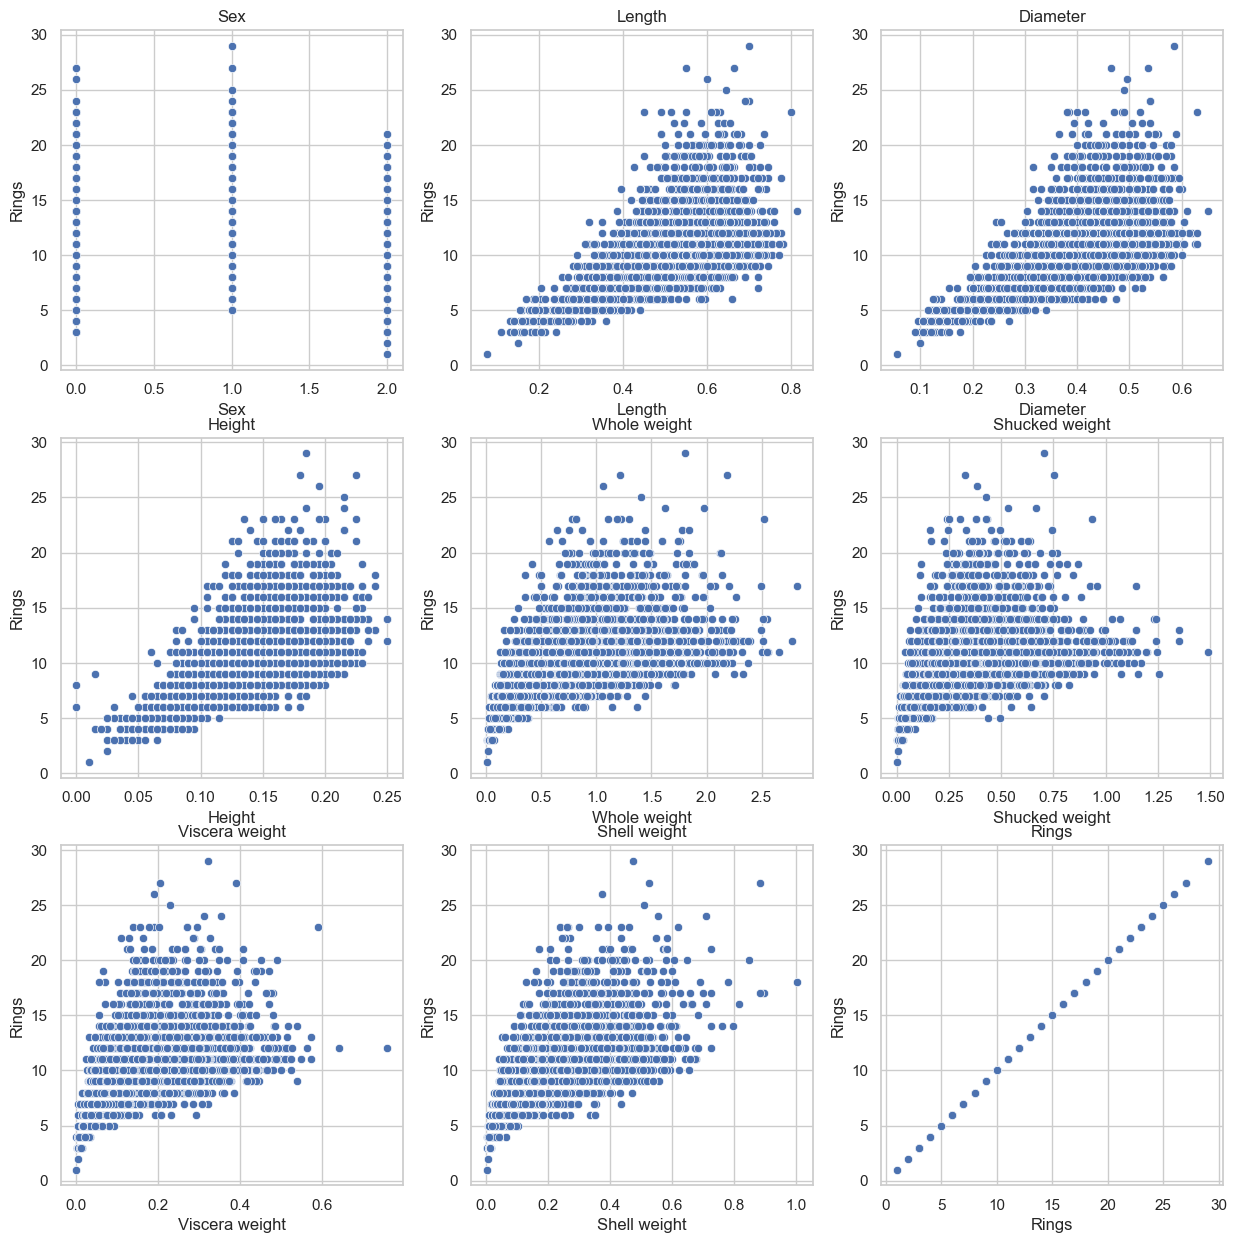

In [165]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15,15))

for i, column in enumerate(df.columns):
    row, col = i//3, i%3
    sns.scatterplot(data=df, x=column, y='Rings', ax=axes[row, col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_label(df.Rings)

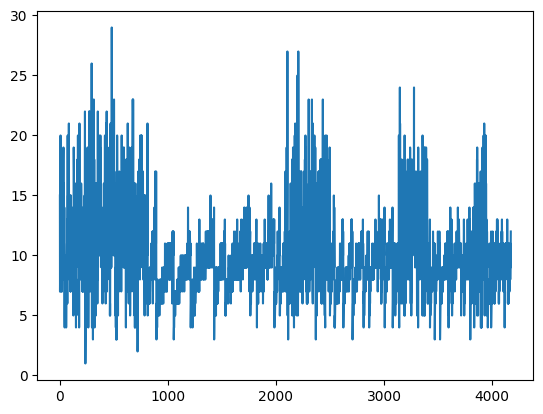

In [27]:
%matplotlib inline
plt.plot(df.Rings)

"전체 무게 >=  조개껍질 벗긴 무게 + 내장 무게 + 껍질 무게" 가 아닌 것은 이상치로 두겠다.  
* 4175개 중 155개 뺀다

In [9]:
(df['Whole weight'] >= df['Shucked weight'] + df['Viscera weight'] + df['Shell weight']).sum()

4020

In [10]:
(df['Whole weight'] >= df['Shucked weight'] + df['Viscera weight'] + df['Shell weight']) 

0       True
1       True
2       True
3       True
4       True
        ... 
4170    True
4171    True
4172    True
4173    True
4174    True
Length: 4175, dtype: bool

In [8]:
# df['Whole weight']는 전체 무게를 나타내는 컬럼입니다.
# df['Shucked weight']는 조개껍질 벗긴 무게를 나타내는 컬럼입니다.
# df['Viscera weight']는 내장 무게를 나타내는 컬럼입니다.
# df['Shell weight']는 껍질 무게를 나타내는 컬럼입니다.

# "전체 무게 >= 조개껍질 벗긴 무게 + 내장 무게 + 껍질 무게"를 만족하지 않는 행들을 데이터프레임에서 제거합니다.
df = df[df['Whole weight'] >= df['Shucked weight'] + df['Viscera weight'] + df['Shell weight']]


In [9]:
df = df.reset_index(drop=True)

In [13]:
len(df)

4020

# Modeling

In [ ]:
# Ridge 회귀, Lasso 회귀

In [68]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4015,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4016,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4017,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4018,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Ridge회귀, Lasso 회귀

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = df['Rings']
X_features = df.drop('Rings',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)


In [20]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses
   
# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 2.198
Ridge 로그 변환된 RMSE: 2.202
Lasso 로그 변환된 RMSE: 3.155


[2.198213678187442, 2.202175630070058, 3.155402835754843]

> Linear Regression

In [21]:
# Linear Regression
y_pred_train_lr = lr_reg.predict(X_train)
y_pred_test_lr = lr_reg.predict(X_test)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
acc_train_lr = 1 - abs((y_pred_train_lr - y_train) / y_train).mean()

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
acc_test_lr = 1 - abs((y_pred_test_lr - y_test) / y_test).mean()

print("Linear Regression:", '\n')
print("************* train")
print("MSE: ", mse_train_lr)
print("Accuracy: ", acc_train_lr, '\n')

print("************* test")
print("MSE: ", mse_test_lr)
print("Accuracy: ", acc_test_lr)


Linear Regression: 

************* train
MSE:  4.760415105198512
Accuracy:  0.8432793709479329 

************* test
MSE:  4.832143374970364
Accuracy:  0.839584057458559


> Ridge Regression

In [22]:
# Ridge Regression
y_pred_train_ridge = ridge_reg.predict(X_train)
y_pred_test_ridge = ridge_reg.predict(X_test)

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
acc_train_ridge = 1 - abs((y_pred_train_ridge - y_train) / y_train).mean()

mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
acc_test_ridge = 1 - abs((y_pred_test_ridge - y_test) / y_test).mean()

print("Ridge Regression:", '\n')
print("************* train")
print("MSE: ", mse_train_ridge)
print("Accuracy: ", acc_train_ridge,'\n')

print("************* test")
print("MSE: ", mse_test_ridge)
print("Accuracy: ", acc_test_ridge)

Ridge Regression: 

************* train
MSE:  4.84697679394227
Accuracy:  0.8416828285984482 

************* test
MSE:  4.849577505674457
Accuracy:  0.8393257487209279


> Lasso Regression

In [23]:
# Lasso Regression
y_pred_train_lasso = lasso_reg.predict(X_train)
y_pred_test_lasso = lasso_reg.predict(X_test)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
acc_train_lasso = 1 - abs((y_pred_train_lasso - y_train) / y_train).mean()

mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
acc_test_lasso = 1 - abs((y_pred_test_lasso - y_test) / y_test).mean()

print("Lasso Regression:", '\n')
print("************* train")
print("MSE: ", mse_train_lasso)
print("Accuracy: ", acc_train_lasso, '\n')

print("************* test")
print("MSE: ", mse_test_lasso)
print("Accuracy: ", acc_test_lasso)


Lasso Regression: 

************* train
MSE:  10.486735708893343
Accuracy:  0.7348878317566093 

************* test
MSE:  9.956567055889705
Accuracy:  0.7462019765081223


이미 baseline code 성능 넘음. 
* baseline code
    * Epoch 10, lr 0.001] 
    * [Train Dataset] Loss = 5.863, Accuracy = 0.824 
    * [Test Dataset] Accuracy = 0.827
  
<br>

* my code (ridge regression이 아직까진 가장 좋음.)
    * [Train Dataset] Loss = 4.84, Accuracy = 0.84
    * [Test Dataset] Loss = 4.84, Accuracy = 0. 839 

NameError: name 'sns' is not defined

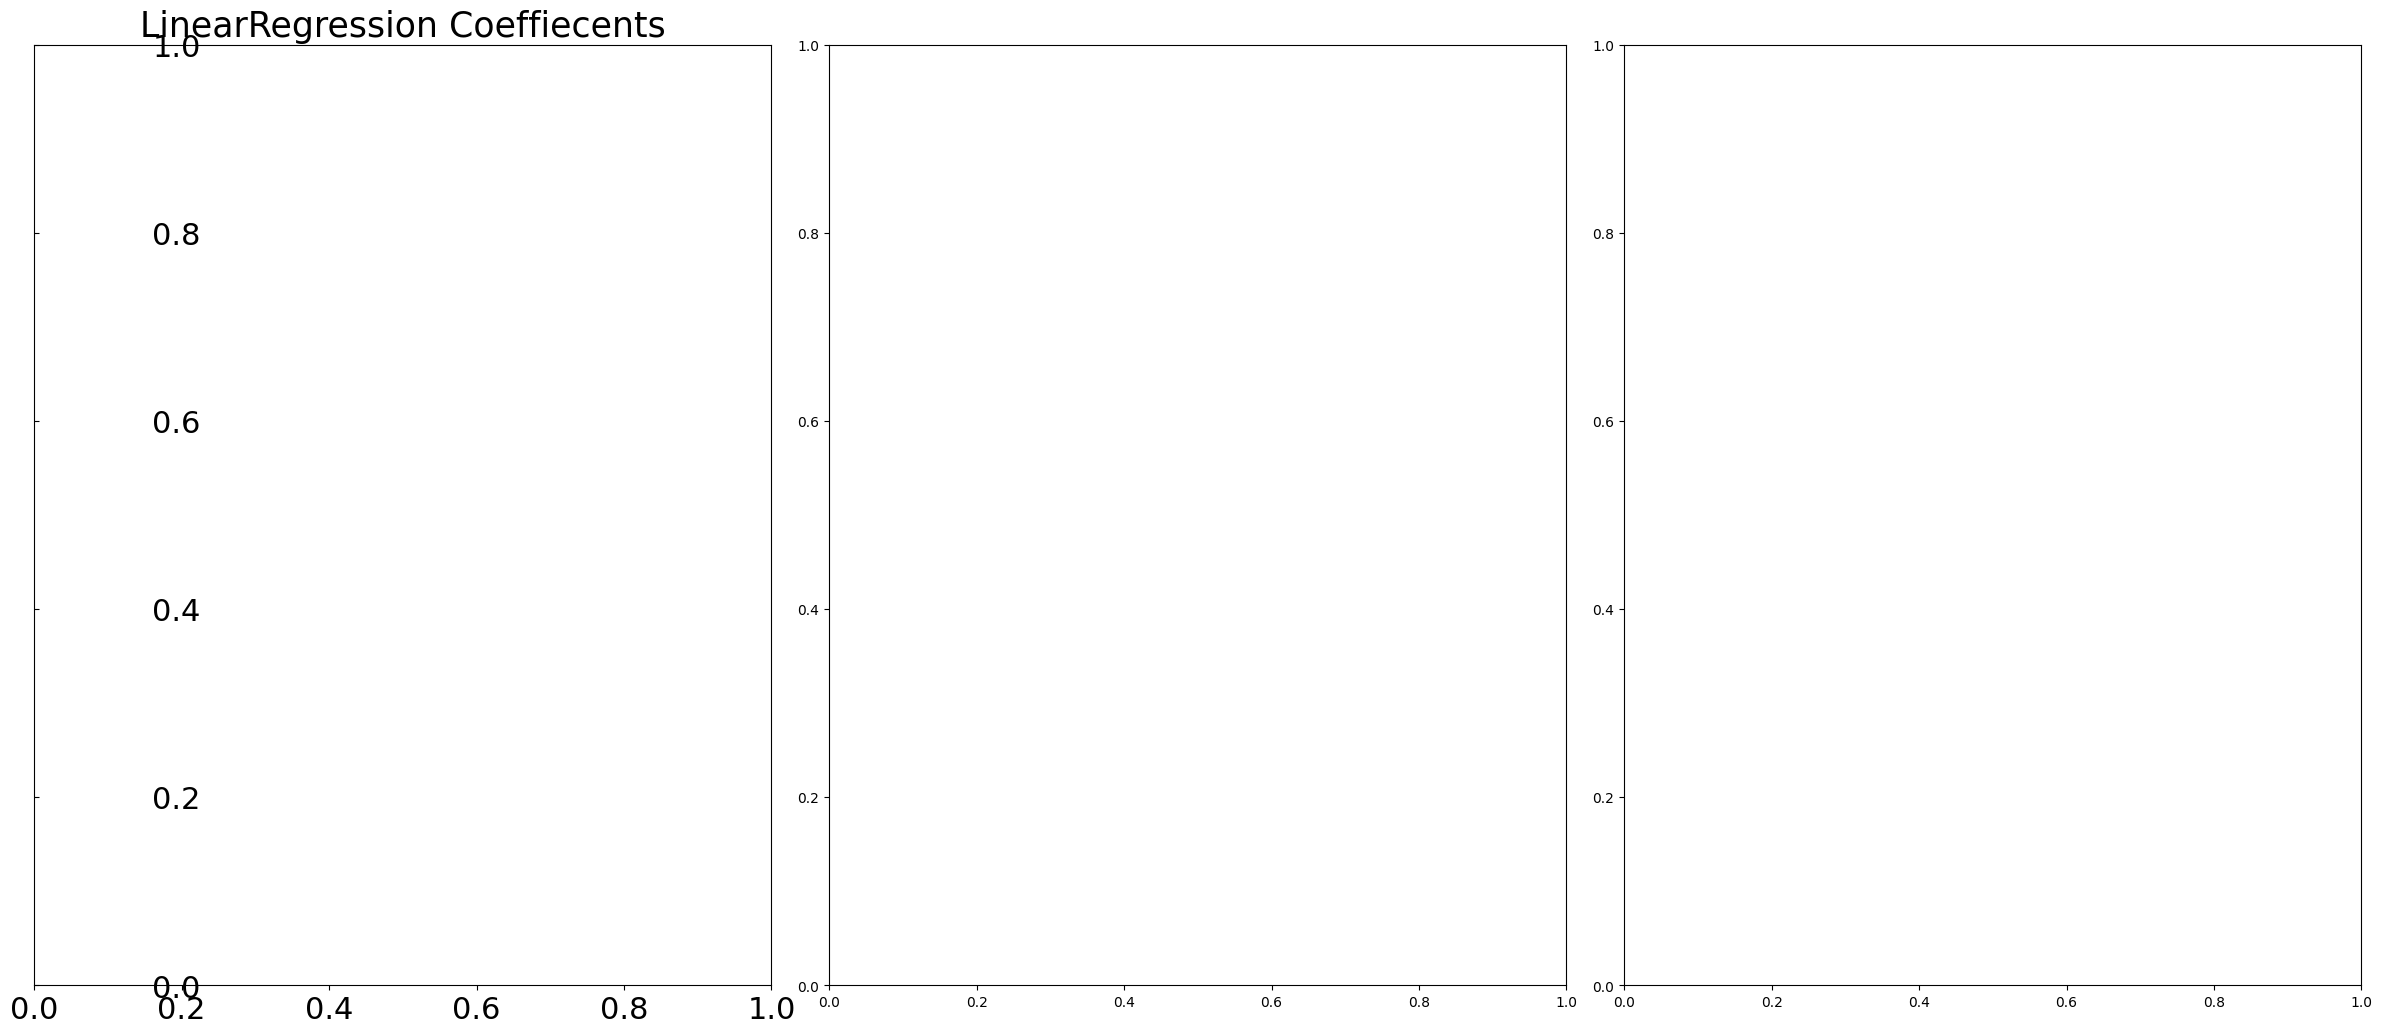

In [24]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

높이, 껍질 무게, 전체 무게, 지름, 길이가 클수록, 조개 나이가 많아지며,  
내장 무게, 껍질 벗긴 무게가 작을수록, 조개 나이가 많아진다.

> 쉽게 말해서, 나이가 든 조개일수록 몸통은 커지나, 내장(이런 안쪽)부분이 작아진다.

성별과 나이는 관련이 없는 것으로 보인다.


In [30]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [3.125 1.698 2.314 1.957 1.969]
LinearRegression CV 평균 RMSE 값: 2.212

Ridge CV RMSE 값 리스트: [3.131 1.694 2.314 1.953 1.968]
Ridge CV 평균 RMSE 값: 2.212

Lasso CV RMSE 값 리스트: [3.154 1.688 2.314 1.948 1.965]
Lasso CV 평균 RMSE 값: 2.214


In [34]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=10)
    grid_model.fit(X_features, y_target)
    mse = -1 * grid_model.best_score_
    print('{0} 10 CV 시 최적 평균 MSE 값: {1}, 최적 alpha: {2}'.format(model.__class__.__name__,
                                                                   np.round(mse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

# 데이터셋과 타겟을 준비하고, 학습용과 테스트용으로 분리한 후 X_train, X_test, y_train, y_test로 할당한다고 가정하겠습니다.

# Ridge Regression
ridge_reg = Ridge()
ridge_params = {'alpha': [0.05, 0.1, 0.005,0.001, 0.0005, 0.0003, 0.0001, 0.00005]}

best_ridge = print_best_params(ridge_reg, ridge_params)

# Lasso Regression
lasso_reg = Lasso()
lasso_params = {'alpha': [0.05, 0.001, 0.005,0.001, 0.0005, 0.0003, 0.0001, 0.00005]}

best_lasso = print_best_params(lasso_reg, lasso_params)


Ridge 10 CV 시 최적 평균 MSE 값: 5.0302, 최적 alpha: {'alpha': 5e-05}


c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.110e+00, tolerance: 3.863e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.477e+00, tolerance: 3.398e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

Lasso 10 CV 시 최적 평균 MSE 값: 5.03, 최적 alpha: {'alpha': 0.0001}


### 최적화한 alpha 값으로 다시 예측 수행

Train RMSEs:
LinearRegression RMSE: 2.1818375524310953
Ridge RMSE: 2.201585063980556
Lasso RMSE: 3.2383229778534046

Test RMSEs:
LinearRegression RMSE: 2.198213678187442
Ridge RMSE: 2.202175630070058
Lasso RMSE: 3.155402835754843

Train Accuracies:
LinearRegression Accuracy: 0.8432793709479329
Ridge Accuracy: 0.8416828285984482
Lasso Accuracy: 0.7348878317566093

Test Accuracies:
LinearRegression Accuracy: 0.839584057458559
Ridge Accuracy: 0.8393257487209279
Lasso Accuracy: 0.7462019765081223


NameError: name 'sns' is not defined

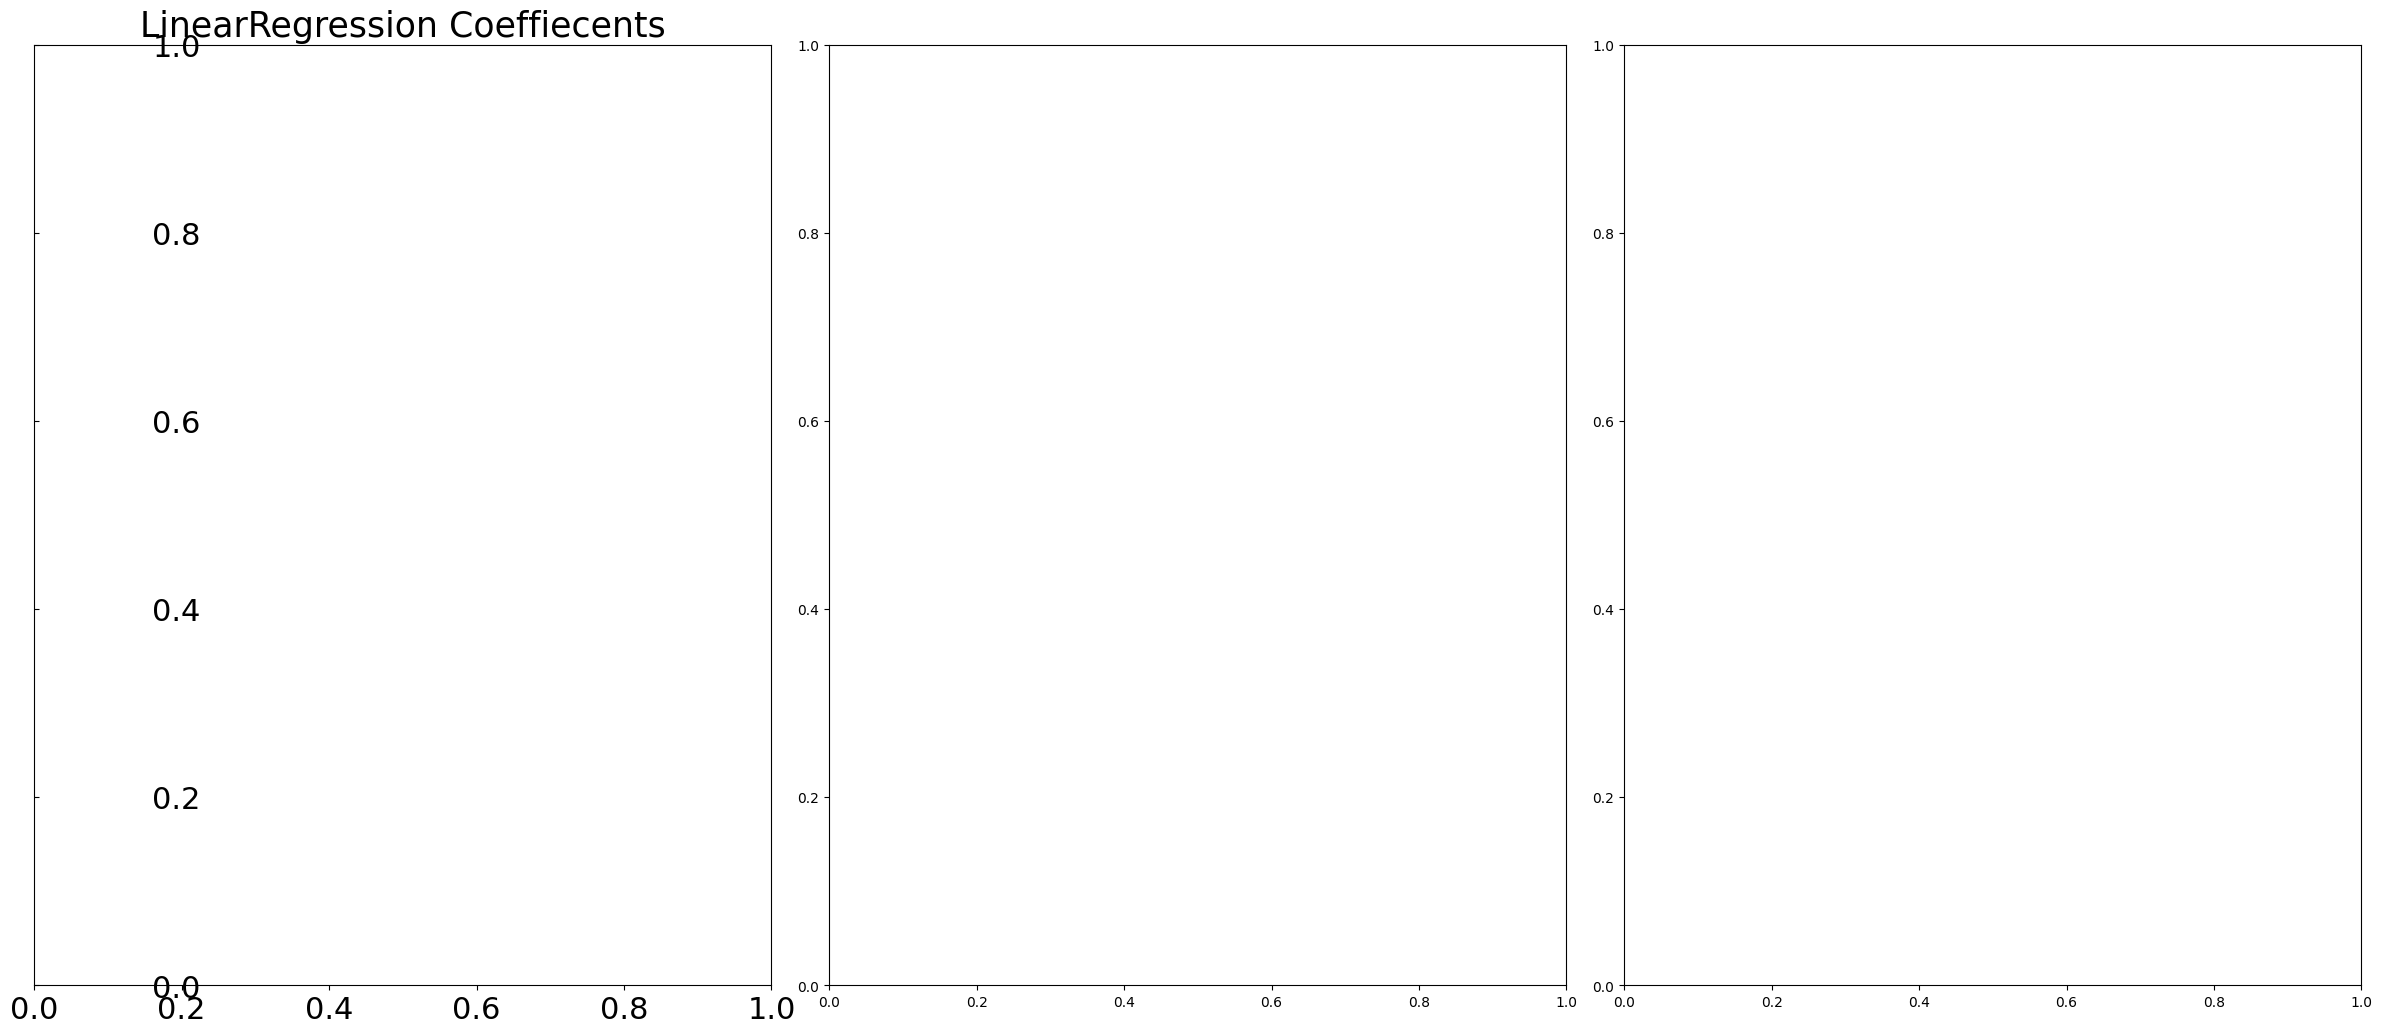

In [26]:
from sklearn.metrics import mean_squared_error

# 정확도 지표 함수 정의
def get_accuracies(models, X, y):
    accuracies = []
    for model in models:
        y_pred = model.predict(X)
        accuracy = 1 - abs((y_pred - y) / y).mean()
        accuracies.append(accuracy)
    return accuracies

# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
def get_rmses(models, X, y):
    rmses = []
    for model in models:
        y_pred = model.predict(X)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        rmses.append(rmse)
    return rmses

train_rmses = get_rmses(models, X_train, y_train)
test_rmses = get_rmses(models, X_test, y_test)

print("Train RMSEs:")
for model, rmse in zip(models, train_rmses):
    print(model.__class__.__name__, "RMSE:", rmse)

print("\nTest RMSEs:")
for model, rmse in zip(models, test_rmses):
    print(model.__class__.__name__, "RMSE:", rmse)

# 모든 모델의 정확도 출력
train_accuracies = get_accuracies(models, X_train, y_train)
test_accuracies = get_accuracies(models, X_test, y_test)

print("\nTrain Accuracies:")
for model, accuracy in zip(models, train_accuracies):
    print(model.__class__.__name__, "Accuracy:", accuracy)

print("\nTest Accuracies:")
for model, accuracy in zip(models, test_accuracies):
    print(model.__class__.__name__, "Accuracy:", accuracy)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)


### XGBOOST

In [15]:
# 릿지, 라쏘 alpha hyper parameter
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [47]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

# 탐색할 하이퍼파라미터들 설정
xgb_params = {
    'n_estimators': [500],
    'learning_rate': [0.01],
    'subsample':[0.8],
    'colsample_bytree':[0.8],
    'max_depth': [3,5,7],
    'min_child_weight':[1,3,5],
    'gamma':[0, 0.1, 0.2]
}

# GridSearchCV를 사용하여 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_reg, param_grid=xgb_params,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터와 최적 모델 얻기
best_xgb = grid_search.best_estimator_

# 최적 모델을 사용하여 예측 수행
y_pred = best_xgb.predict(X_test)


In [48]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.8}


In [56]:
from sklearn.metrics import mean_squared_error

def accuracy(y_true, y_pred):
    return np.mean(1 - np.abs((y_pred - y_true) / y_true))

# 데이터셋과 타겟을 준비하고, 학습용과 테스트용으로 분리한 후 X_train, X_test, y_train, y_test로 할당한다고 가정하겠습니다.

# 모델 생성 (이전 코드와 동일)
xgb_reg = XGBRegressor(n_estimators=400, 
                       learning_rate=0.01, 
                       colsample_bytree=0.8,
                       subsample=0.2,
                       gamma=0.2,
                       max_depth=5,
                       min_child_weight=5)


# 모델 학습 (이전 코드와 동일)
xgb_reg.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = xgb_reg.predict(X_test)

# 정확도 계산
acc = accuracy(y_test, y_pred)

print(f"Mean Accuracy: {acc:.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")


Mean Accuracy: 0.8557
MSE: 4.6448


In [99]:
X = df.drop('Rings', axis=1)
y = df['Rings']

In [85]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [103]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Assume you have your feature matrix X and target vector y ready

# Step 1: Apply PCA to reduce the number of dimensions
pca = PCA(n_components=7)  # Choose the number of components you want to retain
X_reduced = pca.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Step 3: Train the XGBoost model
xgb_reg = XGBRegressor(n_estimators=400, 
                       learning_rate=0.01, 
                       colsample_bytree=0.8,
                       subsample=0.2,
                       gamma=0.2,
                       max_depth=5,
                       min_child_weight=5)
xgb_reg.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
acc= 1 - abs((y_pred- y_test) / y_test).mean()
print(f'ACC: {acc:.4f}')

MSE: 4.6344
ACC: 0.8592


In [105]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [111]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4015,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4016,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4017,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4018,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [200, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.6, 0.8, 1.0],
    #'subsample': [0.6, 0.8, 1.0],
    #'gamma': [0, 0.1, 0.2],
    'max_depth': [5, 7, 9],
    'min_child_weight': [1, 3, 5]
}

# Create XGBoost regressor
xgb_reg = XGBRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best estimator on the test set
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
acc = 1 - abs((y_pred - y_test) / y_test).mean()
print(f"ACC: {acc:.4f}")


In [114]:
new_x = df.drop(['Length', 'Rings'], axis=1)
new_y = df['Rings']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=42)

# Step 3: Train the XGBoost model
xgb_reg = XGBRegressor(n_estimators=400, 
                       learning_rate=0.01, 
                       colsample_bytree=0.8,
                       subsample=0.2,
                       gamma=0.2,
                       max_depth=7,
                       min_child_weight=5)
xgb_reg.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
acc= 1 - abs((y_pred- y_test) / y_test).mean()
print(acc)

MSE: 4.8333
0.8585635069392852


In [109]:
acc

Sex                   -inf
Length            0.951962
Diameter          0.948842
Height            0.830610
Whole weight      0.907247
Shucked weight    0.765055
Viscera weight    0.553927
Shell weight      0.692856
dtype: float64

In [ ]:
MSE : 4.644, Accuracy : 0.855

In [104]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.443174,-0.452856,-0.445517,-0.455628,-0.438087,-0.449423,-0.440447,-0.342248
Length,-0.443174,1.000000,0.986170,0.896616,0.925955,0.900400,0.903443,0.897750,0.543412
Diameter,-0.452856,0.986170,1.000000,0.903115,0.926010,0.895261,0.899737,0.905545,0.561921
Height,-0.445517,0.896616,0.903115,1.000000,0.886518,0.835346,0.864908,0.888959,0.600002
Whole weight,-0.455628,0.925955,0.926010,0.886518,1.000000,0.970990,0.967067,0.956148,0.529971
Shucked weight,-0.438087,0.900400,0.895261,0.835346,0.970990,1.000000,0.932373,0.883016,0.410323
Viscera weight,-0.449423,0.903443,0.899737,0.864908,0.967067,0.932373,1.000000,0.907053,0.494120
Shell weight,-0.440447,0.897750,0.905545,0.888959,0.956148,0.883016,0.907053,1.000000,0.621101
Rings,-0.342248,0.543412,0.561921,0.600002,0.529971,0.410323,0.494120,0.621101,1.000000


length - diameter : 0.98 -> 매우 강한 상관관계, 
height-length도


하나씩 빼보며 돌리기.. 성능 더 좋아지진 않음.

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assume your DataFrame is named 'df'

# Create an empty dictionary to store the performance metrics for each column
column_performance = {}

# Get the list of column names excluding the target column 'Rings'
feature_columns = df.columns.drop('Rings')

# Iterate through each feature column
for column in feature_columns:
    # Select the current feature column and the target column
    X = df[[column]]
    y = df['Rings']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the XGBoost model
    xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1)
    xgb_reg.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = xgb_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the performance metrics for the current column in the dictionary
    column_performance[column] = {'MSE': mse, 'MAE': mae}

# Find the column that resulted in the lowest MSE
best_mse_column = min(column_performance, key=lambda k: column_performance[k]['MSE'])

# Find the column that resulted in the lowest MAE
best_mae_column = min(column_performance, key=lambda k: column_performance[k]['MAE'])

print("Best Performing Column (MSE):", best_mse_column)
print("MSE:", column_performance[best_mse_column]['MSE'])
print("MAE:", column_performance[best_mse_column]['MAE'])

print("Best Performing Column (MAE):", best_mae_column)
print("MSE:", column_performance[best_mae_column]['MSE'])
print("MAE:", column_performance[best_mae_column]['MAE'])


Best Performing Column (MSE): Shell weight
MSE: 6.103099453332792
MAE: 1.7824175636566693
Best Performing Column (MAE): Shell weight
MSE: 6.103099453332792
MAE: 1.7824175636566693


### LightGBM

In [74]:
xgb_params = {
    'n_estimators': [500],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'max_depth':[5],
    'min_child_weight':[6],
    'num_leaves':[2,3,4,5],
    # 'colsample_bytree': [0.5, 0.8, 1.0],
    # 'max_depth': [3, 5, 7],           # 추가: 트리의 최대 깊이
    # 'min_child_weight': [1, 3, 5],    # 추가: 자식 노드에 필요한 최소 샘플 수
    'gamma': [0]      # 추가: 리프 노드를 추가로 분할하는데 필요한 최소 손실 감소 값
}

# GridSearchCV를 사용하여 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_reg, param_grid=xgb_params,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터와 최적 모델 얻기
best_xgb = grid_search.best_params_
best_xgb
# # 최적 모델을 사용하여 예측 수행
# y_pred = best_xgb.predict(X_test)


[21:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



{'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 6,
 'n_estimators': 500,
 'num_leaves': 2,
 'subsample': 0.8}

In [75]:
import seaborn as sns

# LightGBM 모델 생성 (이전 코드와 동일)
lgbm_reg = LGBMRegressor(n_estimators=500, learning_rate=0.01, num_leaves=4, 
                         subsample=0.8, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

# 탐색할 하이퍼파라미터들 설정 (gamma 제거, num_leaves 추가)
lgbm_params = {

    'num_leaves': [4, 8, 16],
    'colsample_bytree': [0.4, 0.6, 0.8],
    'reg_lambda': [0, 1, 10]
}

# GridSearchCV를 사용하여 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(lgbm_reg, param_grid=lgbm_params,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터와 최적 모델 얻기
best_lgbm = grid_search.best_estimator_

# 최적 모델을 사용하여 예측 수행
y_pred = best_lgbm.predict(X_test)

# 시각화를 위해 seaborn을 import
import seaborn as sns

# 이하 코드는 이전과 동일
# accuracy 함수 정의
# RMSE 계산 등

# 시각화 등 나머지 코드도 이전과 동일하게 사용 가능합니다.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1295
[LightGBM] [Info] Number of data points in the train set: 3216, number of used features: 8
[LightGBM] [Info] Start training from score 10.014303


In [76]:
best_lgbm

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, n_estimators=500,
              n_jobs=-1, num_leaves=16, reg_lambda=10, subsample=0.8)

In [70]:
from lightgbm import LGBMRegressor

lgbm_reg = LGBMRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, num_leaves=4)
lgbm_reg.fit(X_train, y_train)
y_pred = lgbm_reg.predict(X_test)

    # 정확도 계산
acc = np.mean(1 - np.abs((y_pred - y_test) / y_test))
print(f"Mean Accuracy: {acc:.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1295
[LightGBM] [Info] Number of data points in the train set: 3216, number of used features: 8
[LightGBM] [Info] Start training from score 10.014303
Mean Accuracy: 0.8365
MSE: 5.2287


In [71]:
from lightgbm import LGBMRegressor

lgbm_reg = LGBMRegressor(n_estimators=500, learning_rate=0.01,num_leaves=4,max_depth=5, reg_alpha=0.5,
                         subsample=0.8, min_child_weight=6, reg_lambda=0.5, n_jobs=-1)
lgbm_reg.fit(X_train, y_train)

y_pred = lgbm_reg.predict(X_test)

    # 정확도 계산
acc = np.mean(1 - np.abs((y_pred - y_test) / y_test))
print('XGBOOST')
print(f"Mean Accuracy: {acc:.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1295
[LightGBM] [Info] Number of data points in the train set: 3216, number of used features: 8
[LightGBM] [Info] Start training from score 10.014303


XGBOOST
Mean Accuracy: 0.8364
MSE: 5.2286


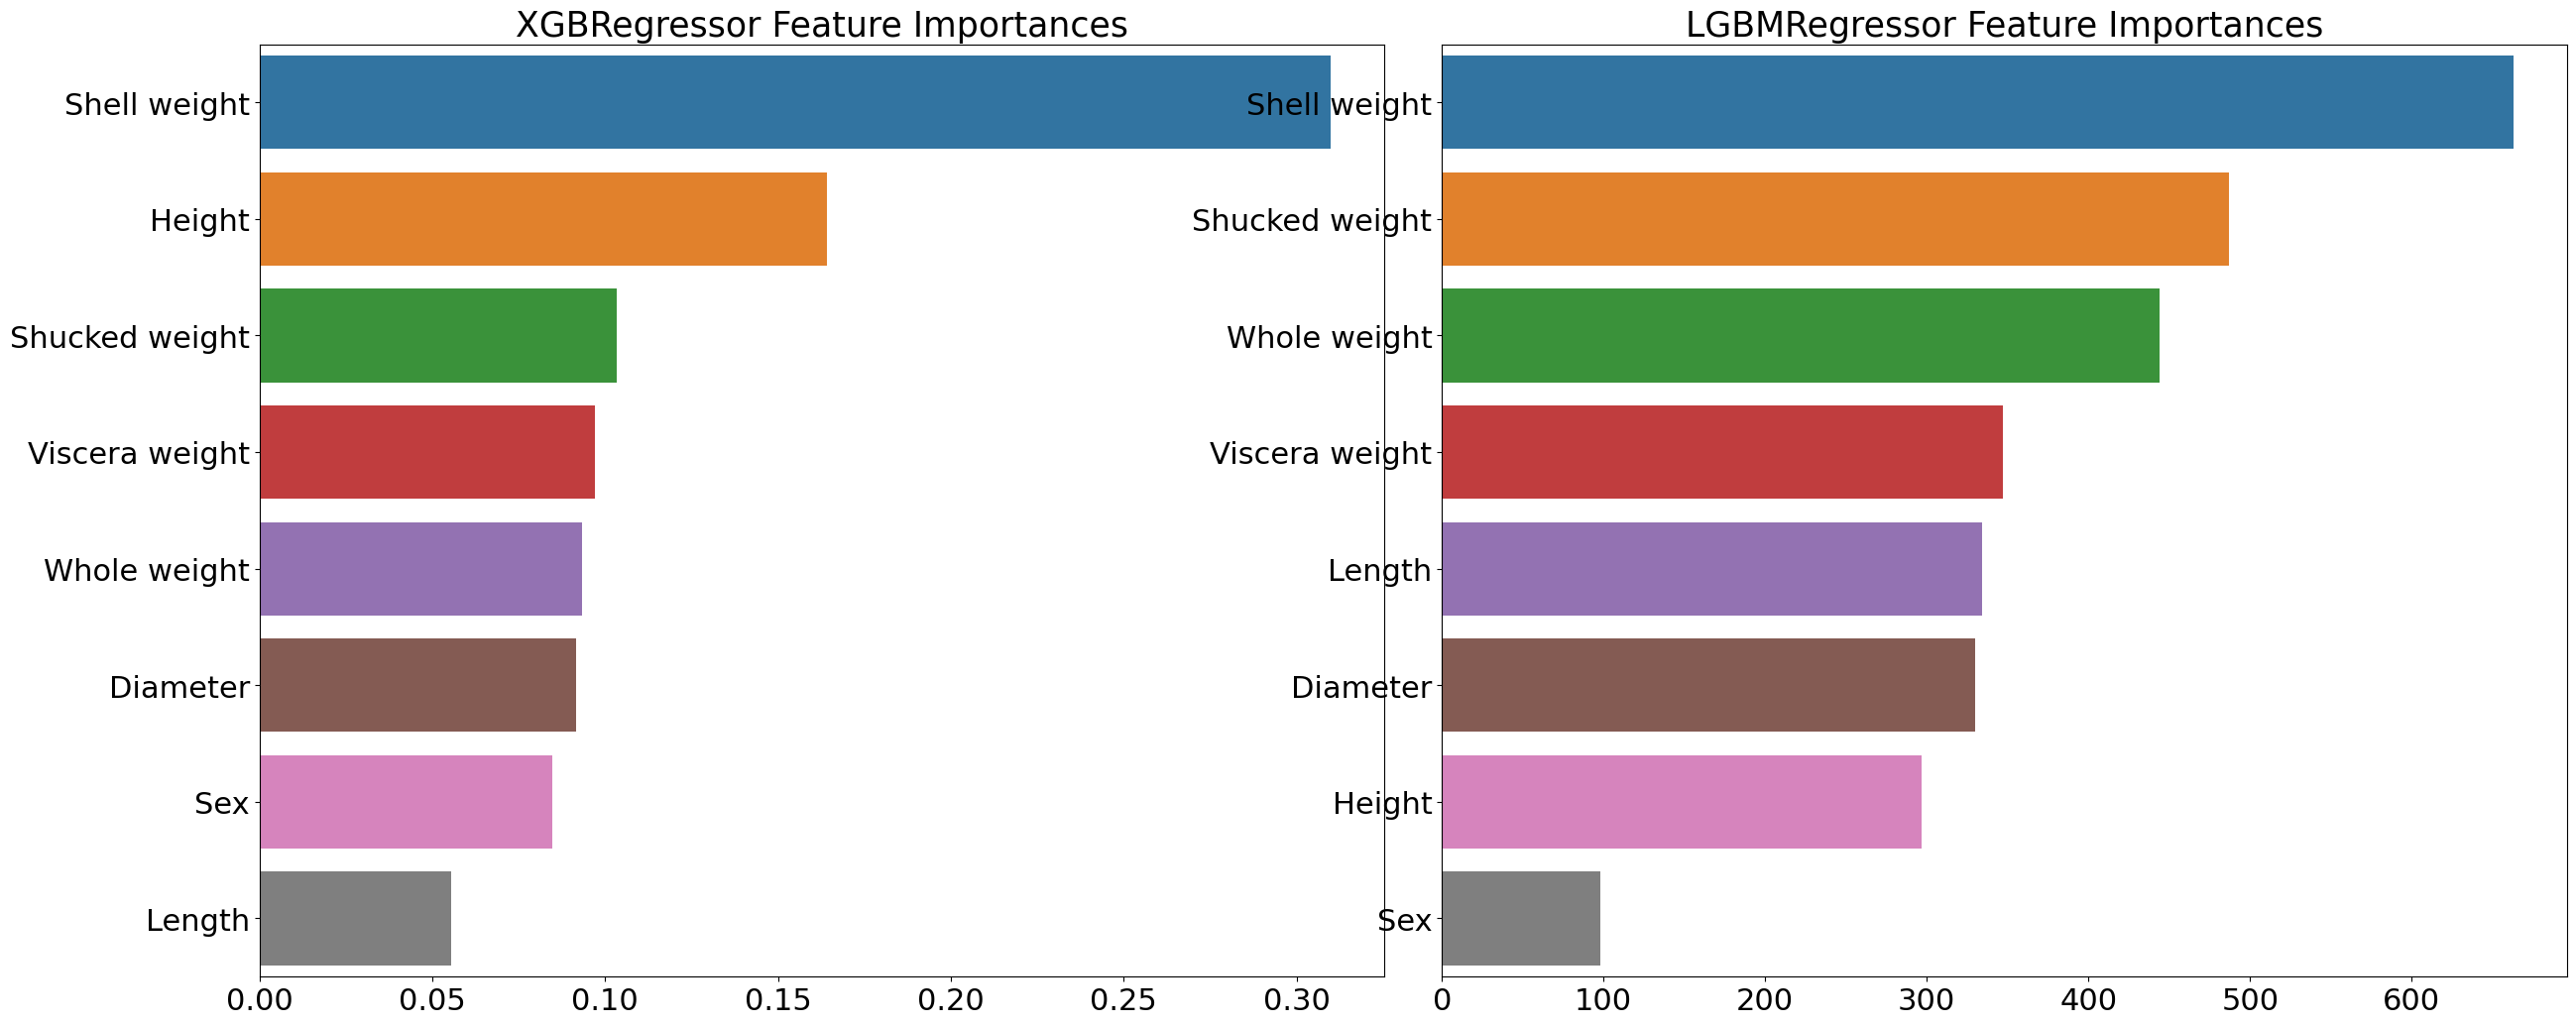

In [43]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [44]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 2.218976525273189
Ridge 모델의 RMSE: 2.319928262509572
Lasso 모델의 RMSE: 2.190907435787137


In [45]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
  
get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1299
[LightGBM] [Info] Number of data points in the train set: 3340, number of used features: 8
[LightGBM] [Info] Start training from score 9.892216
최종 혼합 모델의 RMSE: 2.2050722655532393
XGBM 모델의 RMSE: 2.268191762029097
LGBM 모델의 RMSE: 2.220960388085338


### 스태킹 회귀 모델

In [47]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
       
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
   
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 2672, number of used features: 8
[LightGBM] [Info] Start training from score 9.904940
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 2672, number of used features: 8
[LightGBM] [Info] Start training from score 9.917290
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 2672, number of used features: 8
[LightGBM] [Info] Start 

정확도도 해보기!

randomforest

ensemble (rnn + xgboost)

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from xgboost import XGBRegressor

def rnn_regression(df):
    y_target = df['Rings']
    X_features = df.drop('Rings', axis=1, inplace=False)

    # 데이터 정규화 (Normalization)
    scaler = StandardScaler()
    X_features_scaled = scaler.fit_transform(X_features)

    # 데이터를 학습용과 테스트용으로 분리
    X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target, test_size=0.2, random_state=156)

    # 데이터 형태를 RNN 입력 형태로 변환 (DataFrame to NumPy array)
    X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    # RNN 모델 구성
    model = keras.Sequential([
        layers.GRU(64, activation='relu', input_shape=(1, X_train.shape[1]), return_sequences=True),
        layers.GRU(32, activation='relu', return_sequences=True),
        layers.GRU(16, activation='relu', return_sequences=True),
        layers.GRU(8, activation='relu'),
        layers.Dense(1, kernel_regularizer=l2(0.001))  # L2 규제를 적용한 출력층
    ])

    # 모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error')
    
    # 모델 학습
    model.fit(X_train_rnn, y_train, epochs=10, batch_size=16, verbose=1, validation_split=0.2)

    # 테스트 데이터로 예측
    y_pred_train_rnn = model.predict(X_train_rnn).flatten()
    y_pred_test_rnn = model.predict(X_test_rnn).flatten()

    # MSE 계산
    mse_train_rnn = mean_squared_error(y_train, y_pred_train_rnn)
    acc_train_rnn = 1 - np.abs((y_pred_train_rnn - y_train) / y_train).mean()

    mse_test_rnn = mean_squared_error(y_test, y_pred_test_rnn)
    acc_test_rnn = 1 - np.abs((y_pred_test_rnn - y_test) / y_test).mean()

    print("RNN Regression:", '\n')
    print("************* train")
    print("MSE: ", mse_train_rnn)
    print("Accuracy: ", acc_train_rnn, '\n')

    print("************* test")
    print("MSE: ", mse_test_rnn)
    print("Accuracy: ", acc_test_rnn)

    return y_pred_train_rnn, y_pred_test_rnn, y_train, y_test

def xgboost(df):
    y_target = df['Rings']
    X_features = df.drop('Rings',axis=1, inplace=False)
    
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

    xgb_reg = XGBRegressor(n_estimators=400, 
                        learning_rate=0.01, 
                        colsample_bytree=0.8,
                        subsample=0.2,
                        gamma=0.2,
                        max_depth=5,
                        min_child_weight=5)

    xgb_reg.fit(X_train, y_train)

    y_pred_train_xgb = xgb_reg.predict(X_train)
    y_pred_test_xgb = xgb_reg.predict(X_test)

    # MSE 계산
    mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
    acc_train_xgb = 1 - np.abs((y_pred_train_xgb - y_train) / y_train).mean()

    mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
    acc_test_xgb = 1 - np.abs((y_pred_test_xgb - y_test) / y_test).mean()

    print('XGBoost Model:', '\n')
    print(f"Train MSE: {mse_train_xgb:.4f}")
    print(f"Train Accuracy: {acc_train_xgb:.4f}")
    print(f"Test MSE: {mse_test_xgb:.4f}")
    print(f"Test Accuracy: {acc_test_xgb:.4f}")

    return y_pred_train_xgb, y_pred_test_xgb, y_train, y_test

def ensemble_model(df, num_models=5, epochs=10, batch_size=16):
    rnn_train_preds = []
    rnn_test_preds = []
    xgb_train_preds = []
    xgb_test_preds = []

    for _ in range(num_models):
        rnn_train_pred, rnn_test_pred, y_train, y_test = rnn_regression(df)
        xgb_train_pred, xgb_test_pred, _, _ = xgboost(df)
        rnn_train_preds.append(rnn_train_pred)
        rnn_test_preds.append(rnn_test_pred)
        xgb_train_preds.append(xgb_train_pred)
        xgb_test_preds.append(xgb_test_pred)

    weights_rnn = [0.2, 0.3, 0.1, 0.1, 0.3]
    weights_xgb = [0.3, 0.2, 0.1, 0.2, 0.2]
    y_train_ensemble_rnn = np.average(np.array(rnn_train_preds), axis=0, weights=weights_rnn)
    y_test_ensemble_rnn = np.average(np.array(rnn_test_preds), axis=0, weights=weights_rnn)
    y_train_ensemble_xgb = np.average(np.array(xgb_train_preds), axis=0, weights=weights_xgb)
    y_test_ensemble_xgb = np.average(np.array(xgb_test_preds), axis=0, weights=weights_xgb)

    # Combine the ensemble predictions using weighted averaging
    y_train_ensemble = (y_train_ensemble_rnn + y_train_ensemble_xgb) / 2
    y_test_ensemble = (y_test_ensemble_rnn + y_test_ensemble_xgb) / 2

    # MSE 계산
    # MSE 계산
    mse_train_ensemble = mean_squared_error(y_train, y_train_ensemble)
    acc_train_ensemble = 1 - np.abs((y_train_ensemble - y_train) / y_train).mean()

    mse_test_ensemble = mean_squared_error(y_test, y_test_ensemble)
    acc_test_ensemble = 1 - np.abs((y_test_ensemble - y_test) / y_test).mean()

    print("Ensemble Model Results:", '\n')
    print("************* train")
    print("MSE: ", mse_train_ensemble)
    print("Accuracy: ", acc_train_ensemble, '\n')

    print("************* test")
    print("MSE: ", mse_test_ensemble)
    print("Accuracy: ", acc_test_ensemble)



# 앙상블 모델 실행
ensemble_model(df)


Epoch 1/10
161/161 [==============================] - 22s 28ms/step - loss: 42.6446 - val_loss: 7.2785
Epoch 2/10
161/161 [==============================] - 2s 15ms/step - loss: 6.0502 - val_loss: 5.2997
Epoch 3/10
161/161 [==============================] - 3s 16ms/step - loss: 5.2082 - val_loss: 4.9851
Epoch 4/10
161/161 [==============================] - 2s 15ms/step - loss: 5.0565 - val_loss: 4.5222
Epoch 5/10
161/161 [==============================] - 2s 16ms/step - loss: 4.9504 - val_loss: 4.3197
Epoch 6/10
161/161 [==============================] - 2s 15ms/step - loss: 4.8824 - val_loss: 4.2855
Epoch 7/10
161/161 [==============================] - 2s 15ms/step - loss: 4.7995 - val_loss: 4.3488
Epoch 8/10
161/161 [==============================] - 3s 16ms/step - loss: 4.7339 - val_loss: 4.3013
Epoch 9/10
161/161 [==============================] - 3s 19ms/step - loss: 4.7275 - val_loss: 4.8313
Epoch 10/10
26/26 [==============================] - 0s 7ms/step
RNN Regression: 

******